In [1]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Texas Population 

In [2]:
texas=pd.read_csv('CSV Files/TWFC CSV/Population.csv')
# clean un needed data 
for i in texas.columns:
    if len(texas[i].unique()) ==1:
        texas=texas.drop(i, axis=1)

texas['Population'] = texas['Population'].str.replace(',', '')
texas['Population'] = texas['Population'].astype(int)
        

In [3]:
population_m=round(texas.set_index('Year').sort_index()/1000000, 3)

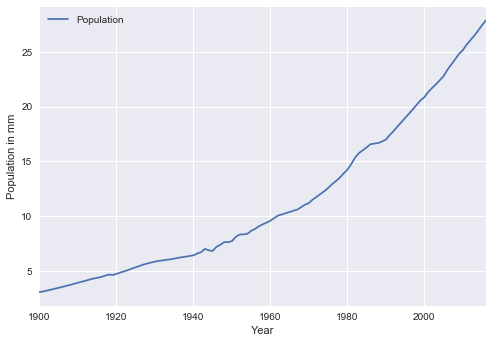

In [4]:
population_m.plot()
plt.ylabel('Population in mm')
plt.show()

## Income 

In [529]:
income=pd.read_csv('CSV Files/TWFC CSV/Income.csv')

In [530]:
income.head()

,Year,Period,Area,Income Source,Income Type,Income
0,2015,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$41,732"
1,2014,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$41,330"
2,2013,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$38,831"
3,2012,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$37,769"
4,2011,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$36,013"


In [531]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
Year             450 non-null int64
Period           450 non-null object
Area             450 non-null object
Income Source    450 non-null object
Income Type      450 non-null object
Income           450 non-null object
dtypes: int64(1), object(5)
memory usage: 21.2+ KB


In [532]:
income['Income'] = income['Income'].str.replace(',', '')
income['Income'] = income['Income'].str.replace('$', '')
income['Income'] = income['Income'].astype(int)

In [533]:
income.head()

,Year,Period,Area,Income Source,Income Type,Income
0,2015,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,41732
1,2014,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,41330
2,2013,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,38831
3,2012,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,37769
4,2011,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,36013


In [534]:
# clean un needed data 
for i in income.columns:
    if len(income[i].unique()) ==1:
        income=income.drop(i, axis=1)

In [535]:
income.head()

,Year,Area,Income
0,2015,Abilene MSA,41732
1,2014,Abilene MSA,41330
2,2013,Abilene MSA,38831
3,2012,Abilene MSA,37769
4,2011,Abilene MSA,36013


In [536]:
#pivot 
income=income.pivot(index='Year', columns='Area', values='Income')

## Annual Income(Mean) per area() 

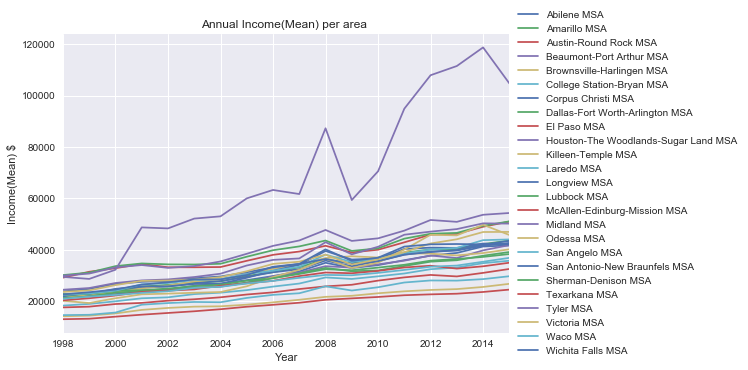

In [73]:
ax=income.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Income(Mean) $')
plt.title('Annual Income(Mean) per area ')
plt.show()

In [85]:
income_pct=round(income.pct_change()*100,1)
income_pct=income_pct.iloc[1:]
income_pct.head()

Area,Abilene MSA,Amarillo MSA,Austin-Round Rock MSA,Beaumont-Port Arthur MSA,Brownsville-Harlingen MSA,College Station-Bryan MSA,Corpus Christi MSA,Dallas-Fort Worth-Arlington MSA,El Paso MSA,Houston-The Woodlands-Sugar Land MSA,...,Midland MSA,Odessa MSA,San Angelo MSA,San Antonio-New Braunfels MSA,Sherman-Denison MSA,Texarkana MSA,Tyler MSA,Victoria MSA,Waco MSA,Wichita Falls MSA
Year,,,,,,,,,,,,,,,,,,,,,
1999,2.9,1.2,7.8,-1.1,1.8,3.5,2.7,3.2,1.7,2.7,...,-2.7,-4.3,2.3,4.2,3.1,3.9,2.7,2.4,4.1,3.8
2000,2.1,3.5,4.4,5.5,5.8,5.3,4.3,8.0,5.7,7.8,...,12.4,9.6,4.6,7.8,6.7,5.0,7.7,8.5,2.9,4.4
2001,3.2,7.6,4.9,4.2,9.0,5.8,7.5,3.1,2.3,2.7,...,50.9,7.2,10.3,3.0,2.5,6.2,3.7,6.2,3.6,7.8
2002,4.0,2.5,-3.7,1.1,4.6,1.8,1.8,-1.0,4.5,-3.2,...,-0.8,1.2,1.9,1.1,1.2,2.1,1.4,0.5,2.8,3.5
2003,5.9,3.8,-0.0,3.2,2.9,5.8,5.0,-0.1,2.7,2.0,...,7.9,1.5,4.3,3.8,3.7,2.0,3.3,1.4,5.4,4.0


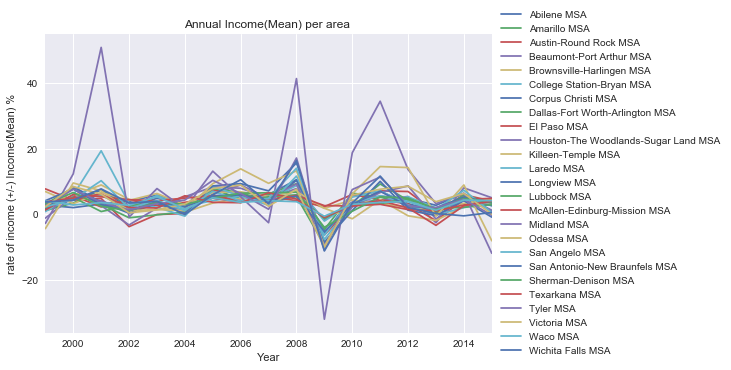

In [86]:
ax=income_pct.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('rate of income (+/-) Income(Mean) %')
plt.title('Annual Income(Mean) per area ')
plt.show()

# Employment Dataset 

In [272]:
files = os.listdir(path='CSV Files/TWFC CSV/')

In [273]:
files.remove('Population.csv')
files.remove('Income.csv')

In [320]:
empdata=[]
for file in files:
    path=f'CSV Files/TWFC CSV/{file}'
    df = pd.read_csv(path)
    col=df.columns[-1]
    col_type=type(df[col].iloc[0])

    if col_type == str: 
        col=df.columns[-1]
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].astype(int)
    
    for i in df.columns:
        if len(df[i].unique()) ==1:
            df=df.drop(i, axis=1)
    empdata.append(df)
    print(f'data frame: {file} added to list')
    
cols=['Year', 'Period ID', 'Period', 'Area']    
df1=pd.merge(empdata[0], empdata[1], on=cols)
df2=pd.merge(empdata[2], empdata[3], on=cols)
TexasWFC=pd.merge(df1, df2, on=cols)

TexasWFC.head()
    

data frame: Employment.csv added to list
data frame: Laborforce.csv added to list
data frame: Unemployment_numbers.csv added to list
data frame: Unemployment_rate.csv added to list


,Year,Period ID,Period,Area,Employment,Labor Force,Unemployment,Unemployment Rate
0,2017,1,Jan,Abilene MSA,71281,74325,3044,4.1
1,2017,2,Feb,Abilene MSA,71645,74869,3224,4.3
2,2017,3,Mar,Abilene MSA,71935,75149,3214,4.3
3,2017,4,Apr,Abilene MSA,72095,75250,3155,4.2
4,2017,5,May,Abilene MSA,71677,74771,3094,4.1


In [321]:
TexasWFC_data=TexasWFC.columns.tolist()[-4:]

In [322]:
TexasWFC_means=TexasWFC.groupby(['Area', 'Year'])[TexasWFC_data].mean()
TexasWFC_means.head()

Employment   Labor Force  Unemployment  Unemployment Rate
Area        Year                                                             
Abilene MSA 1990  64531.416667  68584.166667   4052.750000           5.916667
            1991  65709.333333  69377.416667   3668.083333           5.283333
            1992  67167.250000  71074.333333   3907.083333           5.491667
            1993  68869.916667  72771.000000   3901.083333           5.350000
            1994  70369.500000  73999.500000   3630.000000           4.908333

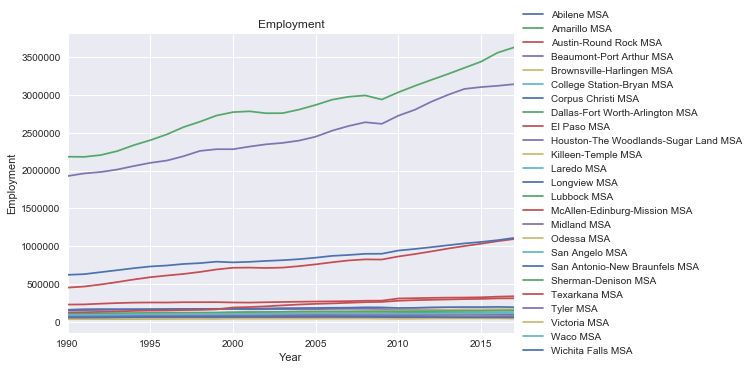

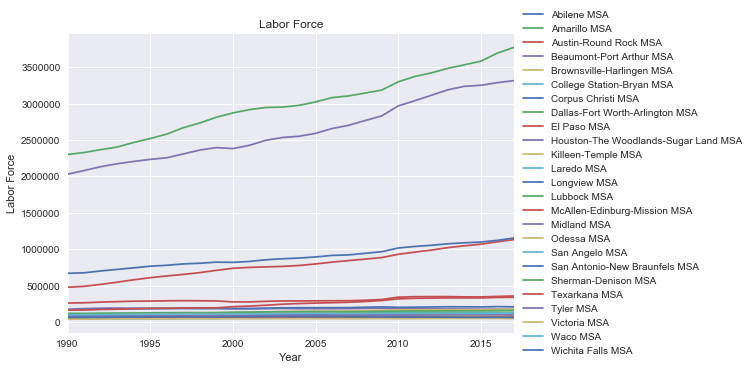

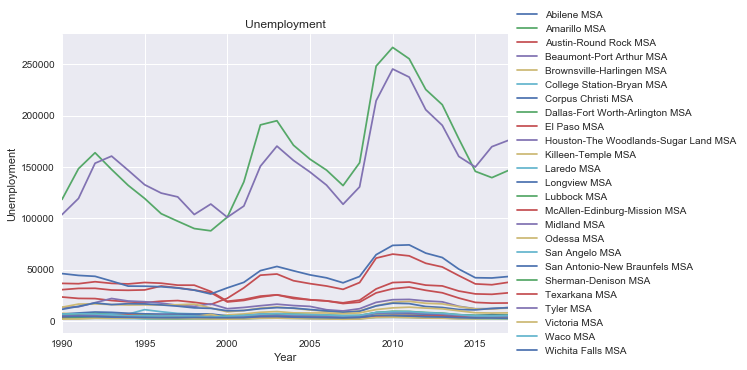

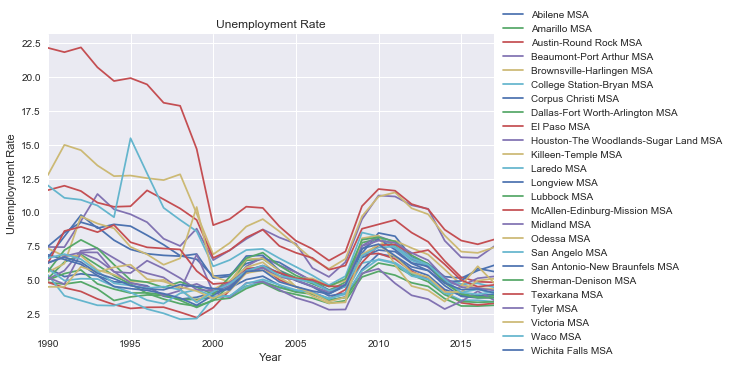

In [337]:
for data in TexasWFC_data:
    TexasWFC_plot=TexasWFC_means.reset_index()
    #TexasWFC_plot=TexasWFC_plot[data]
    data_df=TexasWFC_plot.pivot(index='Year', columns='Area', values=data)
    ax=data_df.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel(f'{data}')
    plt.title(f'{data}')
    plt.show()

In [335]:
TexasWFC_means_change=round(TexasWFC_means.pct_change()*100,1).iloc[1:]
TexasWFC_means_change.head()


Employment  Labor Force  Unemployment  Unemployment Rate
Area        Year                                                          
Abilene MSA 1991         1.8          1.2          -9.5              -10.7
            1992         2.2          2.4           6.5                3.9
            1993         2.5          2.4          -0.2               -2.6
            1994         2.2          1.7          -6.9               -8.3
            1995         3.1          3.0           1.4               -1.9

In [350]:
TexasWFC_plot=TexasWFC_means_change.reset_index()
TexasWFC_plot[TexasWFC_plot.Year>1996]


,Area,Year,Employment,Labor Force,Unemployment,Unemployment Rate
3,Abilene MSA,1994,2.2,1.7,-6.9,-8.3
4,Abilene MSA,1995,3.1,3.0,1.4,-1.9
5,Abilene MSA,1996,1.3,1.1,-3.5,-4.3
6,Abilene MSA,1997,0.3,-0.5,-17.0,-16.6
7,Abilene MSA,1998,0.5,0.3,-5.4,-5.6
8,Abilene MSA,1999,-1.5,-1.3,2.5,3.9
9,Abilene MSA,2000,-0.9,-0.5,8.5,8.8
10,Abilene MSA,2001,-0.5,-0.1,8.1,8.5
11,Abilene MSA,2002,2.5,3.1,17.8,13.9
12,Abilene MSA,2003,2.1,2.4,7.1,4.9


# Change Plots 

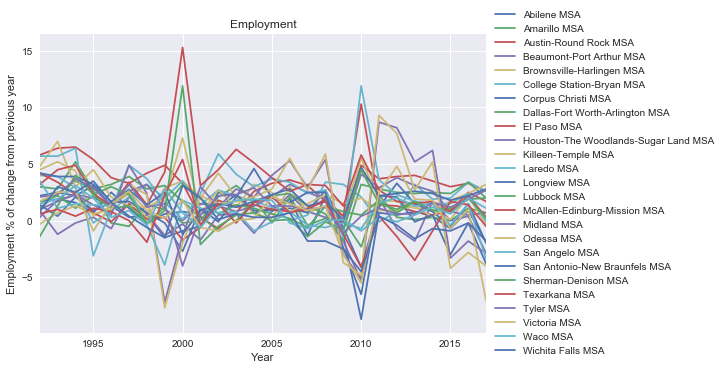

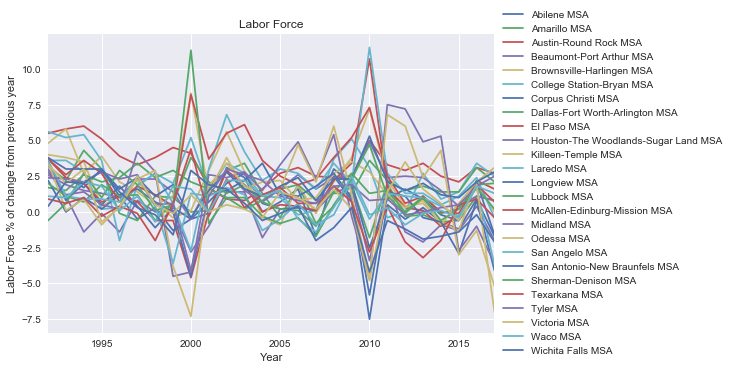

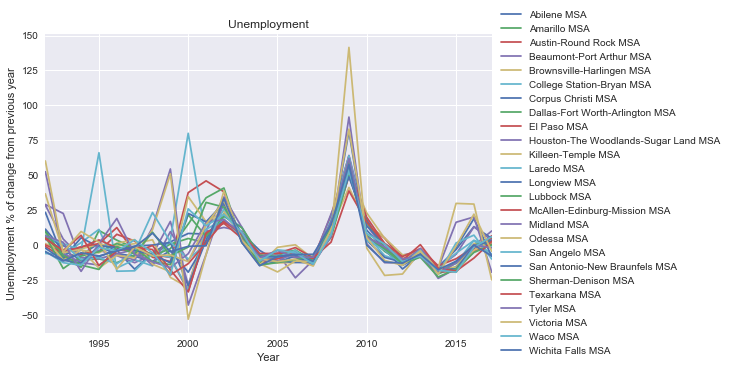

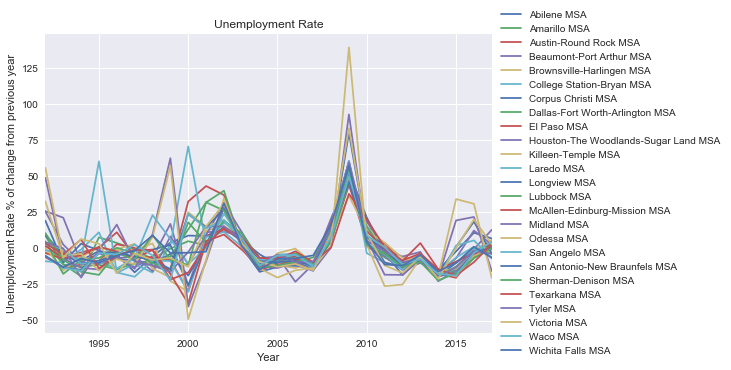

In [354]:
for data in TexasWFC_data:
    TexasWFC_plot=TexasWFC_means_change.reset_index()
    TexasWFC_plot=TexasWFC_plot[TexasWFC_plot.Year>1991]
    #TexasWFC_plot=TexasWFC_plot[data]
    data_df=TexasWFC_plot.pivot(index='Year', columns='Area', values=data)
    ax=data_df.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel(f'{data} % of change from previous year')
    plt.title(f'{data}')
    
    plt.show()

In [355]:
TexasWFC_plot

,Area,Year,Employment,Labor Force,Unemployment,Unemployment Rate
1,Abilene MSA,1992,2.2,2.4,6.5,3.9
2,Abilene MSA,1993,2.5,2.4,-0.2,-2.6
3,Abilene MSA,1994,2.2,1.7,-6.9,-8.3
4,Abilene MSA,1995,3.1,3.0,1.4,-1.9
5,Abilene MSA,1996,1.3,1.1,-3.5,-4.3
6,Abilene MSA,1997,0.3,-0.5,-17.0,-16.6
7,Abilene MSA,1998,0.5,0.3,-5.4,-5.6
8,Abilene MSA,1999,-1.5,-1.3,2.5,3.9
9,Abilene MSA,2000,-0.9,-0.5,8.5,8.8
10,Abilene MSA,2001,-0.5,-0.1,8.1,8.5


# Rent

In [451]:
rent=pd.read_csv('CSV Files/Zillow CSV/Rent.csv').iloc[1:]
sale=pd.read_csv('CSV Files/Zillow CSV/Price.csv').iloc[1:]

In [ ]:
rent['State']=rent['RegionName']
sale['State']=sale['RegionName']

In [452]:
rent.head()

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2418,2414,2407,2402,2404,2409,2411,2411,2417,"New York, NY"
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2275.0,2269.0,2268.0,2268.0,2268.0,2271.0,2272.0,...,2766,2771,2778,2790,2804,2816,2824,2830,2834,"Los Angeles-Long Beach-Anaheim, CA"
3,394463,"Chicago, IL",3,1571.0,1565.0,1564.0,1560.0,1554.0,1547.0,1539.0,...,1669,1670,1676,1685,1691,1695,1695,1697,1700,"Chicago, IL"
4,394514,"Dallas-Fort Worth, TX",4,1295.0,1299.0,1303.0,1307.0,1308.0,1309.0,1309.0,...,1597,1600,1600,1600,1602,1607,1614,1619,1623,"Dallas-Fort Worth, TX"
5,394974,"Philadelphia, PA",5,1551.0,1564.0,1574.0,1583.0,1584.0,1585.0,1583.0,...,1688,1685,1683,1683,1688,1695,1700,1703,1702,"Philadelphia, PA"


In [453]:
sale.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,432500.0,439999.0,449000.0,458894.0,459900.0,459000.0,449869.0,450000.0,459000.0,"New York, NY"
2,"Los Angeles, CA",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,640000.0,650000.0,672245.0,679000.0,670000.0,675000.0,675000.0,675000.0,670000.0,"Los Angeles, CA"
3,"Chicago, IL",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249900.0,259500.0,265000.0,269000.0,269900.0,269000.0,262000.0,260000.0,259900.0,"Chicago, IL"
4,"Dallas, TX",4,164900.0,164900.0,165000.0,166000.0,165000.0,165332.5,164900.0,165000.0,...,300482.5,312500.0,319000.0,320000.0,320000.0,319328.0,315000.0,319000.0,318815.0,"Dallas, TX"
5,"Philadelphia, PA",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205800.0,219900.0,229900.0,235000.0,235000.0,235000.0,229900.0,231900.0,235000.0,"Philadelphia, PA"


In [ ]:
RegionName_rent=rent.RegionName.tolist()
state_rent=[i.split(',')[-1] for i in RegionName]

RegionName_sale=sale.RegionName.tolist()
state_sale=[i.split(',')[-1] for i in RegionName]

In [457]:
State_Map_rent={}
for i in range(len(RegionName_rent)):
    State_Map_rent[RegionName_rent[i]]=state_rent[i]
    
State_Map_sale={}
for i in range(len(RegionName_sale)):
    State_Map_sale[RegionName_sale[i]]=state_sale[i]

In [460]:
rent['State'] = rent['State'].map(State_Map_rent)
sale['State'] = sale['State'].map(State_Map_sale)

In [ ]:
Texas_rent=rent[rent['State'] == ' TX']
Texas_sale=sale[sale['State'] == ' TX']

In [461]:
#QC of Texas Rent 
Texas_rent.head()

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
4,394514,"Dallas-Fort Worth, TX",4,1295.0,1299.0,1303.0,1307.0,1308.0,1309.0,1309.0,...,1597,1600,1600,1600,1602,1607,1614,1619,1623,TX
6,394692,"Houston, TX",6,1365.0,1365.0,1366.0,1368.0,1371.0,1373.0,1371.0,...,1564,1562,1561,1558,1555,1554,1554,1555,1557,TX
26,394466,"Cincinnati, OH",26,959.0,966.0,991.0,1024.0,1060.0,1076.0,1090.0,...,1292,1291,1292,1292,1292,1295,1299,1301,1301,TX
35,394902,"Nashville, TN",35,1174.0,1171.0,1167.0,1166.0,1165.0,1165.0,1165.0,...,1475,1476,1482,1488,1493,1496,1498,1500,1501,TX
68,394843,"McAllen, TX",68,1010.0,1003.0,1007.0,1004.0,996.0,980.0,965.0,...,1035,1031,1034,1038,1034,1023,1011,1003,998,TX


In [462]:
# QC of Texas Sale 
Texas_sale

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
4,"Dallas, TX",4,164900.0,164900.0,165000.0,166000.0,165000.0,165332.5,164900.0,165000.0,...,300482.5,312500.0,319000.0,320000.0,320000.0,319328.0,315000.0,319000.0,318815.0,TX
6,"Houston, TX",6,159000.0,159900.0,160000.0,160000.0,159900.0,159900.0,159000.0,159900.0,...,285000.0,289900.0,293990.0,294900.0,293990.0,289900.0,289900.0,289999.0,289900.0,TX
26,"San Antonio, TX",26,159900.0,162500.0,162500.0,163881.0,164900.0,167085.5,165000.0,164436.5,...,259900.0,269000.0,271495.0,270489.5,275000.0,275000.0,274900.0,274900.0,266000.0,TX
35,"Austin, TX",35,204402.0,203450.0,200595.0,204900.0,205000.0,206333.0,200000.0,204900.0,...,330000.0,336777.5,344990.0,345000.0,345000.0,342489.0,339500.0,335900.0,335000.0,TX
68,"El Paso, TX",68,139950.0,140000.0,139800.0,140000.0,142950.0,144694.0,144900.0,143000.0,...,158500.0,159900.0,159900.0,160000.0,161950.0,161500.0,161450.0,161950.0,163000.0,TX
71,"Edinburg, TX",71,120000.0,125000.0,124999.5,127000.0,119900.0,120000.0,124900.0,126000.0,...,174900.0,175000.0,175000.0,176900.0,178000.0,179900.0,180000.0,181045.0,183000.0,TX
114,"Corpus Christi, TX",114,164900.0,164500.0,164900.0,164100.0,164900.0,165000.0,160000.0,159900.0,...,219900.0,220000.0,224900.0,221209.5,222900.0,224900.0,224995.0,223945.0,219000.0,TX
126,"Brownsville, TX",126,172500.0,174700.0,172250.0,169900.0,174500.0,175000.0,175000.0,165000.0,...,169900.0,170000.0,175000.0,178000.0,179950.0,179900.0,179900.0,180000.0,180000.0,TX
127,"Killeen, TX",127,137900.0,138800.0,139400.0,139900.0,138000.0,137500.0,135000.0,134900.0,...,160400.0,167900.0,169900.0,169900.0,169500.0,168987.5,164700.0,159900.0,160000.0,TX
129,"Beaumont, TX",129,139900.0,135000.0,133632.0,134900.0,134900.0,134900.0,133000.0,137000.0,...,150000.0,159700.0,169000.0,169000.0,169181.0,169000.0,165250.0,169950.0,161547.0,TX


In [463]:
Texas_rent=Texas_rent.drop(['RegionID', 'SizeRank'], axis=1).set_index('RegionName')

In [472]:
Texas_rent_T=Texas_rent.T.reset_index().rename(columns = {'index':'Year_month'})

In [473]:
Texas_rent_T.columns

Index(['Year_month', 'Dallas-Fort Worth, TX', 'Houston, TX', 'Cincinnati, OH',
       'Nashville, TN', 'McAllen, TX', 'North Port-Sarasota-Bradenton, FL',
       'Port St. Lucie, FL', 'Salem, OR', 'Anchorage, AK', 'Myrtle Beach, SC',
       'Cedar Rapids, IA', 'Topeka, KS', 'Tuscaloosa, AL', 'Chico, CA',
       'Tyler, TX', 'Bellingham, WA', 'Yuma, AZ', 'Iowa City, IA',
       'Vero Beach, FL', 'Lumberton, NC', 'Logan, UT', 'Jonesboro, AR',
       'Cumberland, MD', 'Rome, GA', 'Keene, NH', 'Forest City, NC',
       'Faribault, MN', 'Big Stone Gap, VA', 'Platteville, WI',
       'St. Marys, GA', 'Tahlequah, OK', 'Duncan, OK', 'Cedartown, GA',
       'Gainesville, TX', 'North Platte, NE', 'Newberry, SC', 'Huntington, IN',
       'Peru, IN', 'Cordele, GA', 'Brookings, OR'],
      dtype='object', name='RegionName')

In [475]:
Texas_rent_T['Month']=Texas_rent_T['Year_month']
Texas_rent_T['Year']=Texas_rent_T['Year_month']

In [476]:
Texas_rent_T.head()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","Cincinnati, OH","Nashville, TN","McAllen, TX","North Port-Sarasota-Bradenton, FL","Port St. Lucie, FL","Salem, OR","Anchorage, AK",...,"Duncan, OK","Cedartown, GA","Gainesville, TX","North Platte, NE","Newberry, SC","Huntington, IN","Peru, IN","Cordele, GA","Brookings, OR",Month
0,2010-11,1295,1365,959,1174,1010,1602,1109,999,NaN,...,737,942,1178,1012,903,881,788,938,NaN,2010-11
1,2010-12,1299,1365,966,1171,1003,1586,1118,1006,NaN,...,738,941,1176,1016,916,893,782,935,NaN,2010-12
2,2011-01,1303,1366,991,1167,1007,1564,1127,1016,NaN,...,742,939,1177,1017,919,892,774,931,NaN,2011-01
3,2011-02,1307,1368,1024,1166,1004,1549,1136,1032,NaN,...,744,941,1173,1017,916,889,766,927,NaN,2011-02
4,2011-03,1308,1371,1060,1165,996,1545,1144,1048,1780,...,749,939,1168,1014,909,880,754,924,NaN,2011-03


In [480]:
Texas_rent_T=Texas_rent_T.iloc[:-2]

In [481]:
Texas_rent_T.tail()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","Cincinnati, OH","Nashville, TN","McAllen, TX","North Port-Sarasota-Bradenton, FL","Port St. Lucie, FL","Salem, OR","Anchorage, AK",...,"Duncan, OK","Cedartown, GA","Gainesville, TX","North Platte, NE","Newberry, SC","Huntington, IN","Peru, IN","Cordele, GA","Brookings, OR",Month
78,2017-05,1600,1558,1292,1488,1038,1798,1492,1499,1931,...,755,934,1302,1138,945,868,792,895,1467,2017-05
79,2017-06,1602,1555,1292,1493,1034,1793,1502,1502,1934,...,757,933,1303,1139,957,878,792,896,1482,2017-06
80,2017-07,1607,1554,1295,1496,1023,1789,1517,1511,1934,...,758,934,1305,1144,965,899,794,895,1494,2017-07
81,2017-08,1614,1554,1299,1498,1011,1785,1529,1521,1935,...,760,935,1310,1149,968,918,796,895,1493,2017-08
82,2017-09,1619,1555,1301,1500,1003,1780,1538,1529,1934,...,757,937,1316,1150,964,931,798,895,1486,2017-09


In [489]:
Rent_Year_Month=Texas_rent_T.Month.tolist()
Rent_Month=[i.split('-')[-1] for i in Rent_Year_Month]
Rent_Year=[i.split('-')[0] for i in Rent_Year_Month]


In [494]:
State_Map_Rent_Month={}
for i in range(len(Rent_Month)):
    State_Map_Rent_Month[Rent_Year_Month[i]]=Rent_Month[i]
    
State_Map_Rent_Year={}
for i in range(len(Rent_Year)):
    State_Map_Rent_Year[Rent_Year_Month[i]]=Rent_Year[i]

In [497]:
Texas_rent_T.head()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","Cincinnati, OH","Nashville, TN","McAllen, TX","North Port-Sarasota-Bradenton, FL","Port St. Lucie, FL","Salem, OR","Anchorage, AK",...,"Cedartown, GA","Gainesville, TX","North Platte, NE","Newberry, SC","Huntington, IN","Peru, IN","Cordele, GA","Brookings, OR",Month,Year
0,2010-11,1295,1365,959,1174,1010,1602,1109,999,NaN,...,942,1178,1012,903,881,788,938,NaN,2010-11,2010-11
1,2010-12,1299,1365,966,1171,1003,1586,1118,1006,NaN,...,941,1176,1016,916,893,782,935,NaN,2010-12,2010-12
2,2011-01,1303,1366,991,1167,1007,1564,1127,1016,NaN,...,939,1177,1017,919,892,774,931,NaN,2011-01,2011-01
3,2011-02,1307,1368,1024,1166,1004,1549,1136,1032,NaN,...,941,1173,1017,916,889,766,927,NaN,2011-02,2011-02
4,2011-03,1308,1371,1060,1165,996,1545,1144,1048,1780,...,939,1168,1014,909,880,754,924,NaN,2011-03,2011-03


In [498]:
Texas_rent_T['Month'] = Texas_rent_T['Month'].map(State_Map_Rent_Month)
Texas_rent_T['Year'] = Texas_rent_T['Year'].map(State_Map_Rent_Year)

C:\Users\aerwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aerwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [508]:
Texas_rent_T.drop('Year_month', axis=1, inplace=True)

C:\Users\aerwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [513]:
Houston_rent=Texas_rent_T[['Houston, TX', 'Year', 'Month']]

In [519]:
Houston_rent=Houston_rent.iloc[:][:].astype(int)

In [523]:
Houston_rent=Houston_rent.rename(columns = {'Houston, TX':'Rent'})

In [561]:
Houston_rent_mean=Houston_rent.groupby('Year').Rent.mean().reset_index()

In [547]:
Houston_income=income.reset_index()[['Houston-The Woodlands-Sugar Land MSA', 'Year']]

In [549]:

Houston_income=Houston_income.rename(columns = {'Houston-The Woodlands-Sugar Land MSA':'Income'})
Houston_income

Area,Income,Year
0,30007,1998
1,30804,1999
2,33219,2000
3,34122,2001
4,33035,2002
5,33711,2003
6,35518,2004
7,38496,2005
8,41575,2006
9,43675,2007


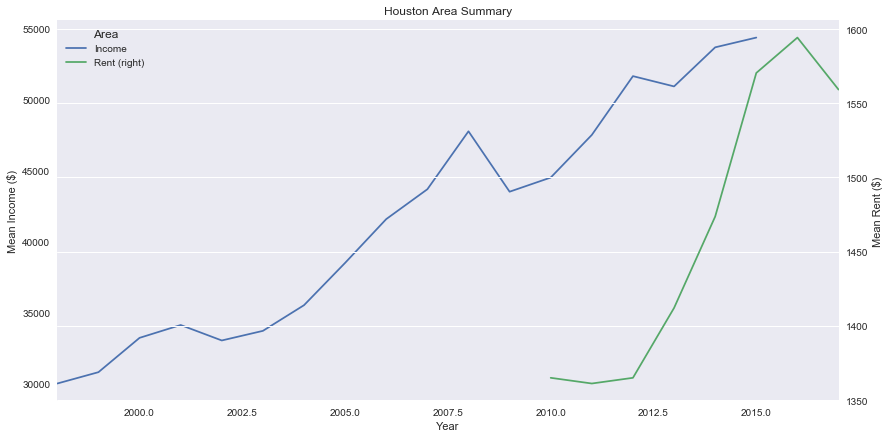

In [585]:
ax=Houston_income.plot(x='Year',figsize=(14,7))
Houston_rent_mean.plot(x='Year', ax=ax, secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Mean Rent ($)')
ax.set_ylabel('Mean Income ($)')
ax.set_title('Houston Area Summary')
plt.show()